<center><h1>Logistic Regression using Python</h1>

![](https://imgur.com/Bw5gMJX.jpg)

In this notebook we will try to implement a Logistic Regression without relying to Python's easy-to-use [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) library. This notebook aims to create a Logistic Regression without the help of in-built Logistic Regression libraries to help us fully understand how Logistic Regression works in the background. <br>

<h2>Introduction: What is Logistic Regression?<br></h2>
Logistic regression is a regression analysis that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category. For this particular notebook we will try to predict whether a customer will click the add or not using a Logistic Regression.<br><br>


<h2>Logistic Regression behind the mask</h2>

Before we start coding let us first understand or atleast try to understand the things happening at the back-end of Logistic Regression. The aim of this section, **Logistic Regression behind the mask** is to explain the math behind Logistic Regression and to accomplish the first objective of this kernel. To be able to do this we must answer the question, how does a Logistic Regression work? In theory, a Logistic regression takes input and returns an output of probability, a value between 0 and 1. How does a Logistic Regression do that? With the help of a function called a *logistic function* or most commonly known as a *sigmoid*. This sigmoid function is reponsible for *predicting* or classifying a given input.
Logistic function or sigmoid is defined as:
![](https://imgur.com/Bw5gMJX.jpg)





Where:
* *e* = Euler's number which is **2.71828**.
* *x0* = the value of the sigmoid's midpoint on the x-axis.
* *L* = the maximum value.
* *k* = steepness of the curve.

<h2>Some Python Libraries<h2>

<p style="text-align: justify;">In the first place, Let's define some libraries to help us in the manipulation the data set, such as `pandas`, `numpy`, `matplotlib`, `seaborn`. In this tutorial, we are implementing a Logistic Regression without `sikit-learn`. The goal here is to be as simple as possible! So to help you with this task, we implementing the Logistic regression without using ready-made libraries.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

The logistic regression equation has a very similar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

or

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_1$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.


For Logistic Regression however here is the definition of the logistic function:<br>
![](https://imgur.com/903IYoN.jpg)







Where:
* Θ = is the weight.

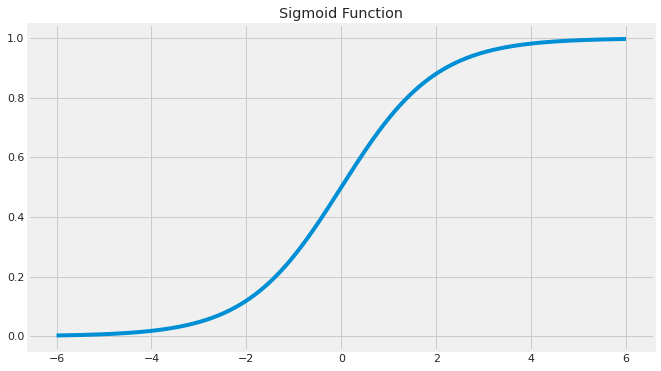

In [2]:
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.title("Sigmoid Function")
plt.show()

In python code:

In [3]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

From here, there are two common ways to approach the optimization of the Logistic Regression. One is through loss minimizing with the use of **gradient descent** and the other is with the use of **Maximum Likelihood Estimation**. I will try to explain these two in the following sections.

<h4>1. Loss minimizing</h4><br>
Weights (represented by theta in our notation) is a vital part of Logistic Regression and other Machine Learning algorithms and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function.<br>

The loss function is defined as:

![](https://imgur.com/riDHhZS.jpg)

Where:
* m = the number of samples
* y = the target class

In python code:

In [4]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

The goal is to **minimize the loss**  by means of increasing or decreasing the weights, which is commonly called fitting. Which weights should be bigger and which should be smaller? This can be decided by a function called **Gradient descent**. The Gradient descent is just the derivative of the loss function with respect to its weights. Below links explains how Gradient descent is derived: <br>
* [https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html#step-by-step](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html#step-by-step)
* [http://mccormickml.com/2014/03/04/gradient-descent-derivation/](http://mccormickml.com/2014/03/04/gradient-descent-derivation/)

![](https://imgur.com/rBVzJbt.jpg)

The weights are updated by substracting the derivative (gradient descent) times the learning rate, as defined below:
![](https://imgur.com/TAIpnwI.jpg)

Where:
* α = learning rate (usually 0.1)

In python code:

In [5]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

So, we've finished covering one of the steps on LR optimization **Loss minimization** with the use of gradient descent. We will now jump to maximum likelihood estimation.

<h4>2. Maximum likelihood estimation</h4><br>
One step to optimize logistic regression is through likelihood estimation, the goal here is to **maximize the likelihood** we can achieve this through Gradient ascent, not to be mistaken from gradient descent. Gradient ascent is the same as gradient descent, except its goal is to maximize a function rather than minimizing it.<br>
Maximum likelihood:

![](https://imgur.com/VCU0TKj.jpeg)
z is defined above

In python code:

In [6]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

Now, the gradient of the log likelihood is the derivative of the log likelihood function. The full derivation of the maximum likelihood estimator can be found [here](https://www.analyticsvidhya.com/blog/2015/10/basics-logistic-regression/)

![](https://imgur.com/Uvo3rPv.jpg)

The weights are now updated by adding the derivative (gradient ascent) times the learning rate, as defined below:

![](https://imgur.com/hIB0LQ0.jpg)

In python code:

In [7]:
def gradient_ascent(X, h, y):
    return np.dot(X.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

Now I think we're done understanding the math behind Logistic Regression, just a recap:<br>
1. We learned that Logistic Regression can be used for Classification because the output is a number between 0 and 1.
1. We understood the two common ways of optimizing Logistic Regression, minimizing the loss and the other is maximizing the likelihood.
1. We learned the difference between Gradient descent and gradient ascent.<br>

<h2>Python implementation</h2>

<h4> Ad click Project <h4>

Let us now start implementing what we learned from the previous section into python codes. We will use a website data of Customers to understand which customer will be click the AD, by the end of this section we will be able to make predictions using our "home-made" Logistic Regression.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

# Importing the dataset

In [8]:
from google.colab import files
data = files.upload()

Saving Web_data_v1.csv to Web_data_v1 (1).csv


In [9]:
df = pd.read_csv("/content/Web_data_v1 (1).csv")

# Basic Data Exploration

In [10]:
df.head()

,VistID,Time_Spent,Age,Avg_Income,Internet_Usage,Ad_Topic,Country_Name,City_code,Male,Time_Period,Weekday,Month,Year,Clicked
0,5183153,87.97,43,55901.12,185.46,product_11,Serbia,City_5,No,Mid-Night,Thursday,July,2020,0
1,4023265,51.63,50,39132.00,176.73,product_8,Turkmenistan,City_1,No,Evening,Saturday,June,2020,1
2,4708083,82.37,38,57032.36,210.60,product_6,Northern Mariana Islands,City_2,No,Morning,Tuesday,January,2020,0
3,9771815,62.06,45,48868.00,190.05,product_19,South Africa,City_3,Yes,Morning,Thursday,April,2020,1
4,6451317,77.66,31,61608.23,204.86,product_11,Guadeloupe,City_2,No,Noon,Thursday,January,2020,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VistID          6657 non-null   int64  
 1   Time_Spent      6657 non-null   float64
 2   Age             6657 non-null   int64  
 3   Avg_Income      6657 non-null   float64
 4   Internet_Usage  6657 non-null   float64
 5   Ad_Topic        6657 non-null   object 
 6   Country_Name    6657 non-null   object 
 7   City_code       6657 non-null   object 
 8   Male            6657 non-null   object 
 9   Time_Period     6657 non-null   object 
 10  Weekday         6657 non-null   object 
 11  Month           6657 non-null   object 
 12  Year            6657 non-null   int64  
 13  Clicked         6657 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 728.2+ KB


In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
VistID,6657,NaN,NaN,NaN,5.54211e+06,2.59628e+06,1.00019e+06,3.30743e+06,5.52391e+06,7.82394e+06,9.99971e+06
Time_Spent,6657,NaN,NaN,NaN,66.8495,15.5097,32.6,55.2,70.66,79.57,91.43
Age,6657,NaN,NaN,NaN,37.2588,10.9955,19,28,36,46,61
Avg_Income,6657,NaN,NaN,NaN,55930.5,13110.3,13996.5,48454,58183,65957,79484.8
Internet_Usage,6657,NaN,NaN,NaN,184.948,43.1899,104.78,145.73,193.58,222.26,269.96
Ad_Topic,6657,30,product_22,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_Name,6657,237,Canada,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_code,6657,9,City_1,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male,6657,2,No,3571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_Period,6657,6,Evening,1266,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.nunique()

VistID            6657
Time_Spent         900
Age                 43
Avg_Income        1487
Internet_Usage     966
Ad_Topic            30
Country_Name       237
City_code            9
Male                 2
Time_Period          6
Weekday              7
Month                7
Year                 1
Clicked              2
dtype: int64

## check duplicates

In [14]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    6657
dtype: int64
6657


## Checking missing value

In [15]:
df.isnull().sum()

VistID            0
Time_Spent        0
Age               0
Avg_Income        0
Internet_Usage    0
Ad_Topic          0
Country_Name      0
City_code         0
Male              0
Time_Period       0
Weekday           0
Month             0
Year              0
Clicked           0
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration, this dataset have 6657 rows and 14 columns also we see there are no missing values in this dataset and no duplicate rows.

#### The selected columns in this step are not final, further study will be done and then a final list will be created
- VistID: Qualitative
- Time_Spent: Continuous
- Age: Continuous
- Avg_Income: Continuous
- Internet_Usage: Continuous
- Ad_Topic: Categorical
- Country_Name: Categorical
- City_code: Categorical
- Male: Categorical
- Time_Period: Categorical
- Weekday: Categorical
- Month: Categorical
- Year: Categorical
- Clicked: Categorical. This is the Target Variable!

### Target Variable

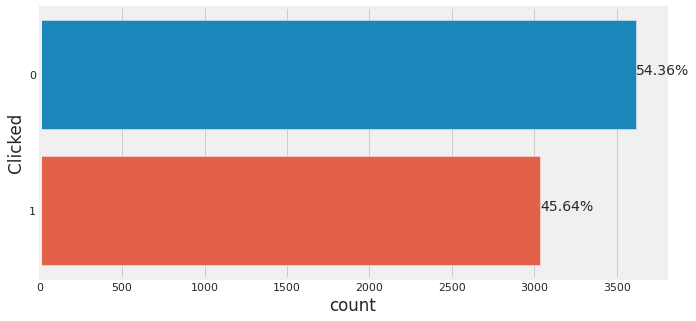

In [16]:
plt.figure(figsize=(10,5))
plt.rc("font", size=14)
ax = sns.countplot(y ='Clicked',data=df)
total = len(df['Clicked'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
plt.rc("font", size=14)
plt.show()

- Over here we see that class 0 have 3619 rows and class 1 have 3038 rows.
- After checking the percentage of those class it didn't imply that this data is imbalanced.

# Exploratory Data Analysis

### Create a variables list based on their types.

In [17]:
categorical_col=[]
numerical_col=[]

for col in df.columns[2:-1]:
  if df[col].dtype =="object":
    categorical_col.append(col)
  elif df[col].dtype =="int64" or df[col].dtype =="float64":
    numerical_col.append(col)

## Visual exploration (Categorical Vs Categorical) -- Bar Charts or Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and Grouped Bar Plots

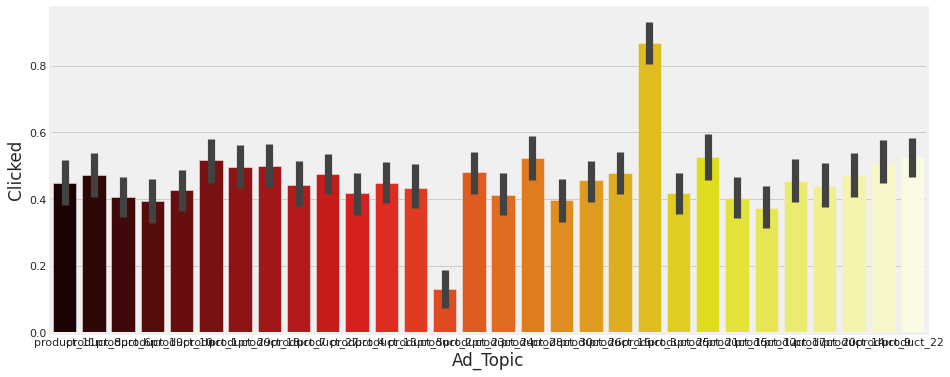

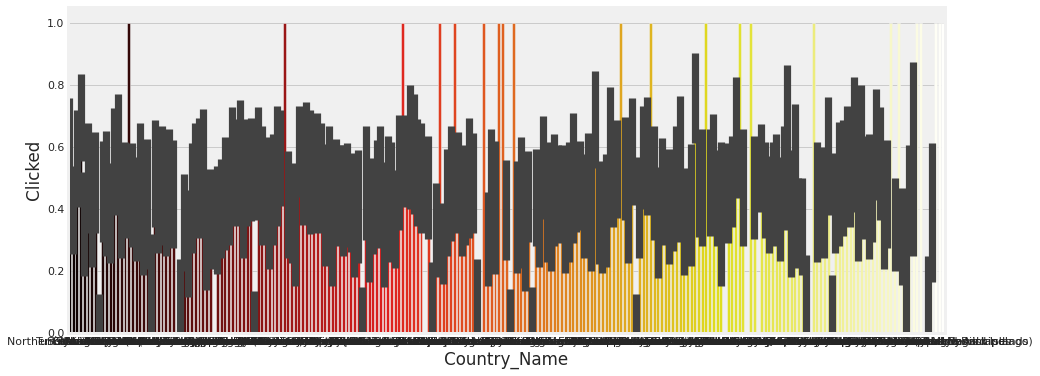

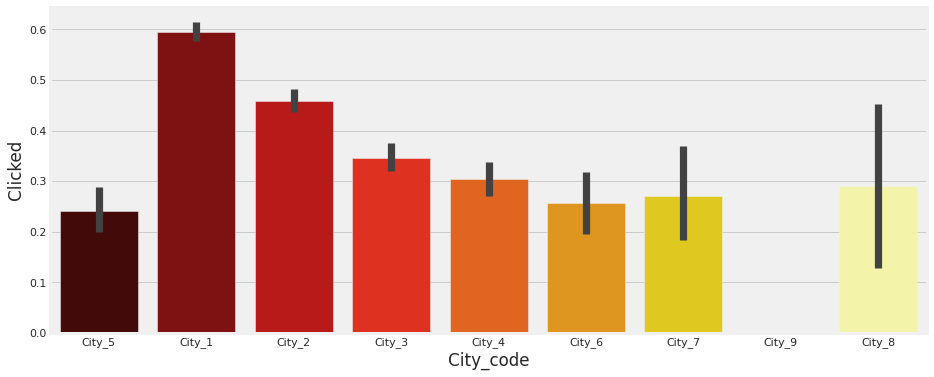

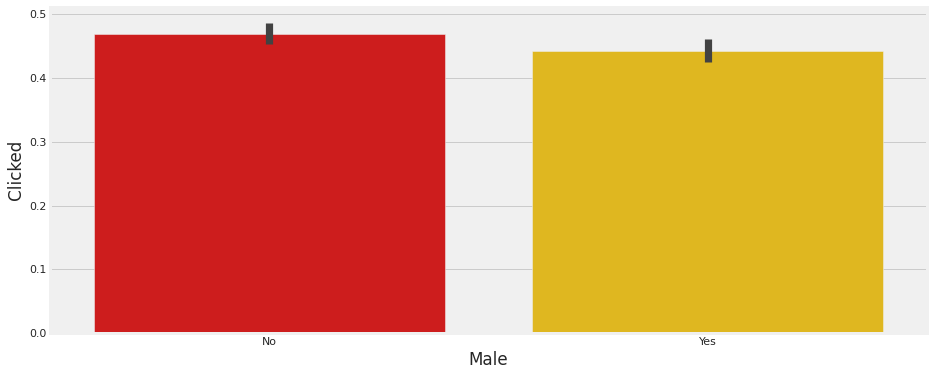

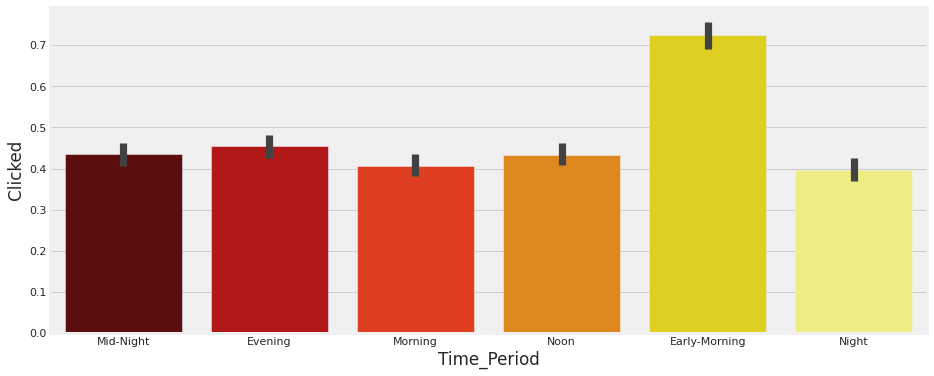

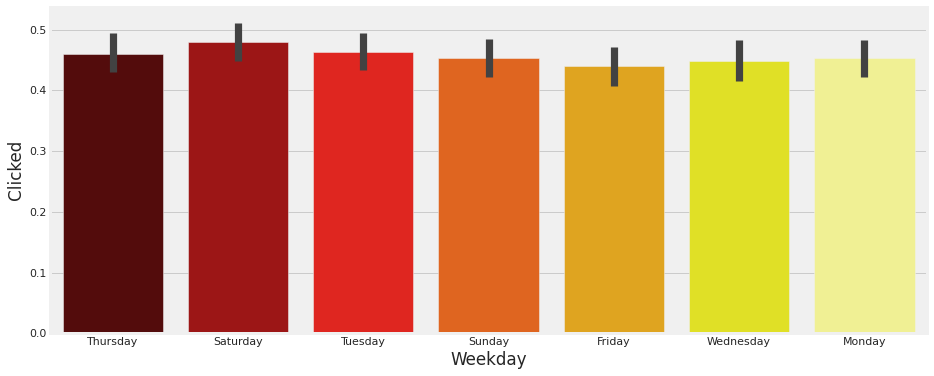

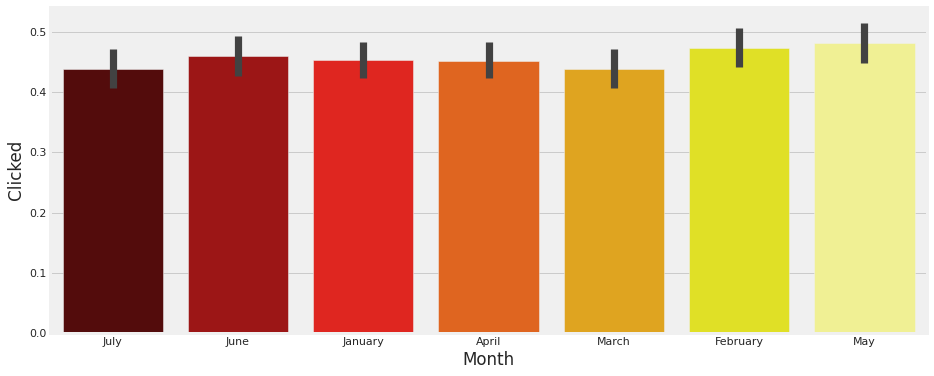

In [18]:
for col in categorical_col:
  plt.figure(figsize=(14, 6))
  sns.barplot(data=df,x=col,y="Clicked",palette='hot')
  plt.show()

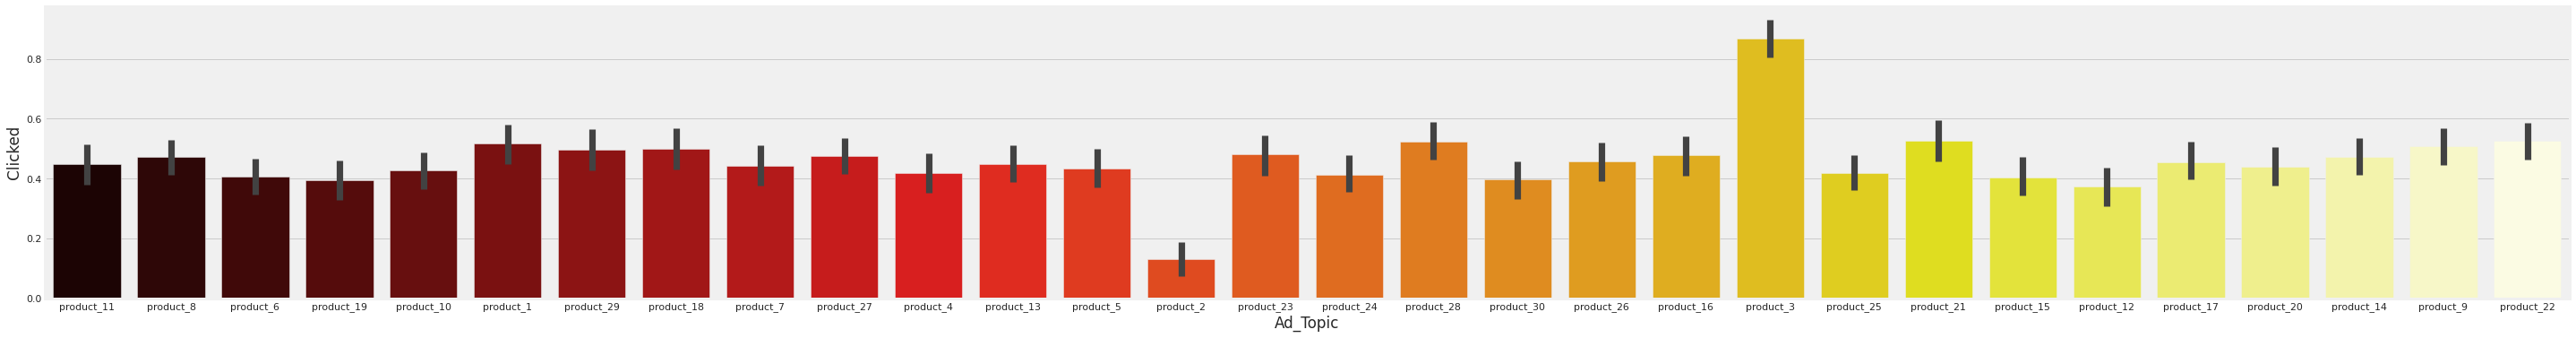

In [19]:
plt.figure(figsize=(45, 6))
sns.barplot(data=df,x="Ad_Topic",y="Clicked",palette='hot')
plt.show()

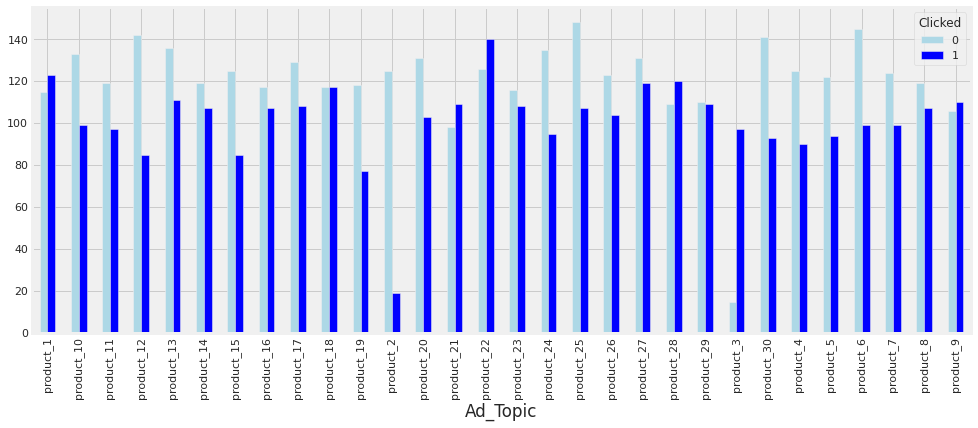

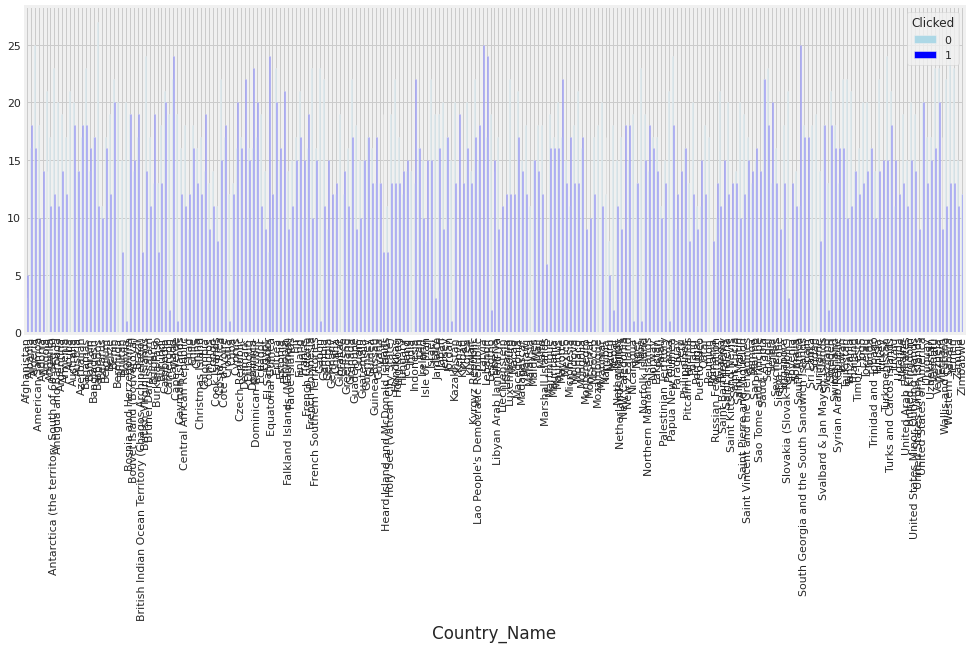

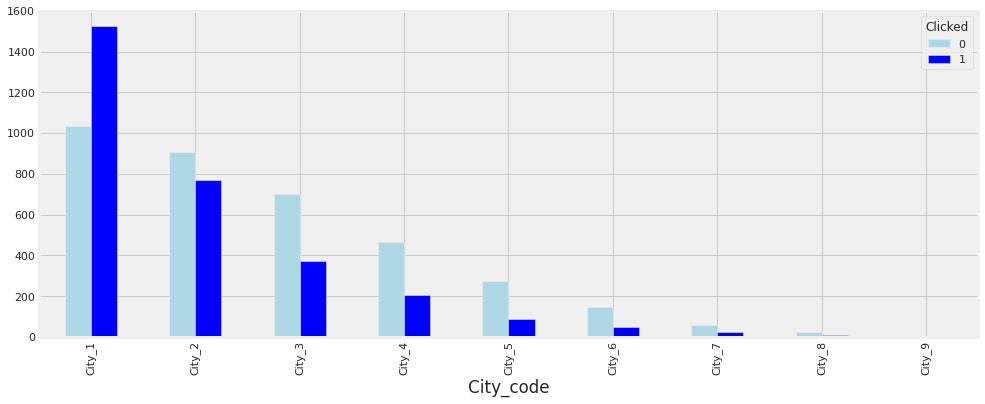

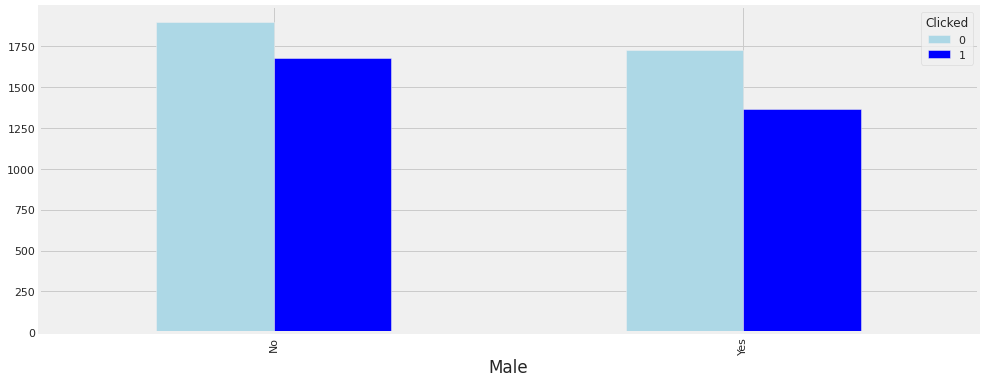

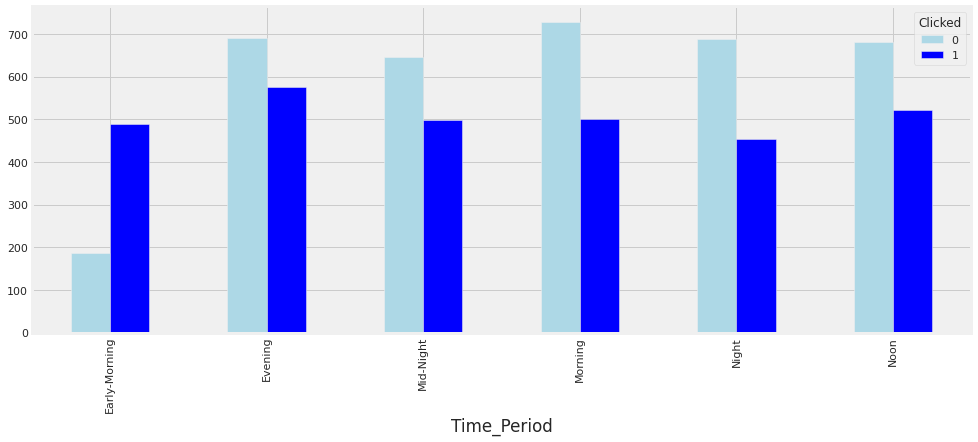

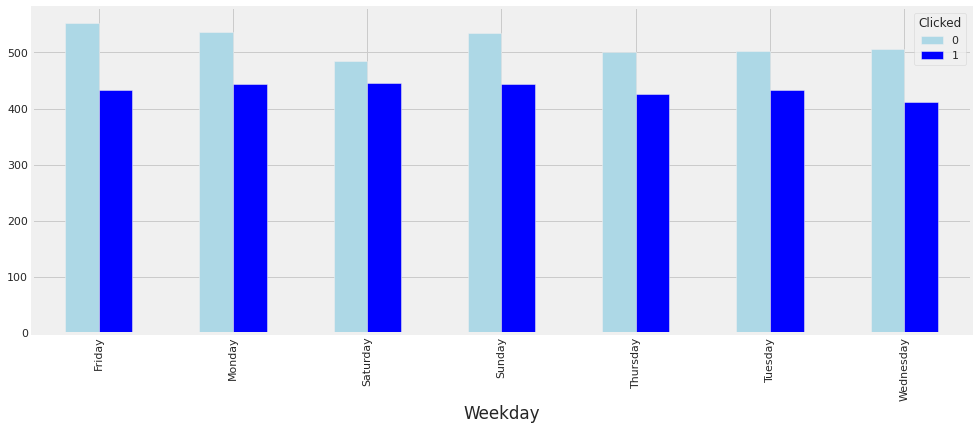

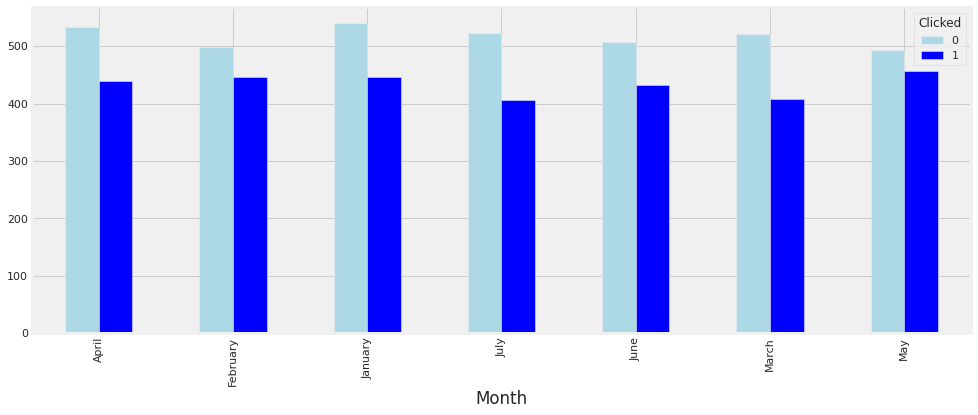

In [20]:
# Creating Grouped bar plots for each categorical predictor against the Target Variable "Clicked"
for col in categorical_col:
  CrossTabResult=pd.crosstab(index=df[col], columns=df["Clicked"])
  CrossTabResult.plot.bar(color=['lightblue','blue'], figsize=(15,6))
  plt.show()

### From above plots we learn that
- In `Ad_Topic` all the others ads distrivution is same except 'product_2' ad is lowest and 'product_3' ad is highest but in case of 'product_3' the click rate is highest than any other product
- In `City_Code` most of the country have only one cities data that's why the distribution is high of 'city_1' but we also see that In case any countries have more than one city the 'city_1' people have more clicked the ad other than other cities.
- In `Male` columns we see the similar distribution and clicked rate only count of male visitor are more than female that's why click rate also higher than female.
- In `Time_Prediod` we see most people visit the website in 'early_morning' similary the click rate of ad is higher in that time.
- In `week_day` the distibution and click rate is same.
- In `Month` column we see more visitor in february and may month and similarly the ad click rate also high in those months.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [21]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### chi-square Results ##### \n')
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            SelectedPredictors.append(predictor)
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            
    return(SelectedPredictors)

In [22]:
# Calling the function
FunctionChisq(inpData=df, 
              TargetVariable="Clicked",
              CategoricalVariablesList= categorical_col)

##### chi-square Results ##### 

Ad_Topic is correlated with Clicked | P-Value: 1.2676573604736464e-24
Country_Name is correlated with Clicked | P-Value: 1.597874205627287e-63
City_code is correlated with Clicked | P-Value: 2.6667953391697526e-88
Male is correlated with Clicked | P-Value: 0.02695171301745074
Time_Period is correlated with Clicked | P-Value: 4.465745015735695e-47
Weekday is NOT correlated with Clicked | P-Value: 0.7226317326250824
Month is NOT correlated with Clicked | P-Value: 0.4229049097263303


['Ad_Topic', 'Country_Name', 'City_code', 'Male', 'Time_Period']

## We see 'Ad_Topic', 'Country_Name', 'City_code', 'Male', 'Time_Period' are imporatant varibles.

## Visual exploration (Continuous Vs Categorical) -- Histogram and Box/Violin Plots
When the target variable is Categorical and the predictor is also Continuous then we explore the correlation between them visually using Histogram and Box Plots or Violin Plots.

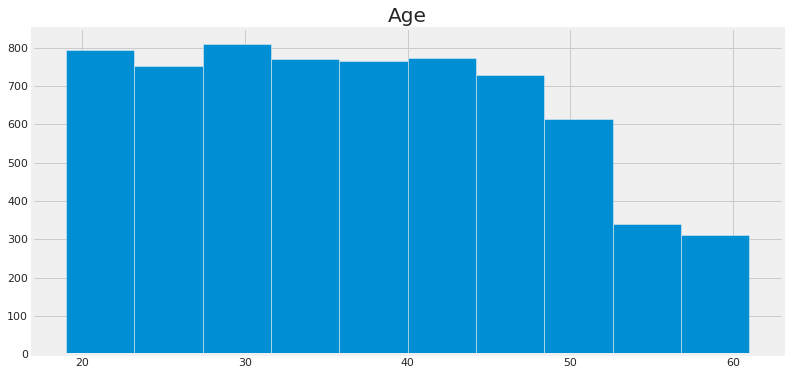

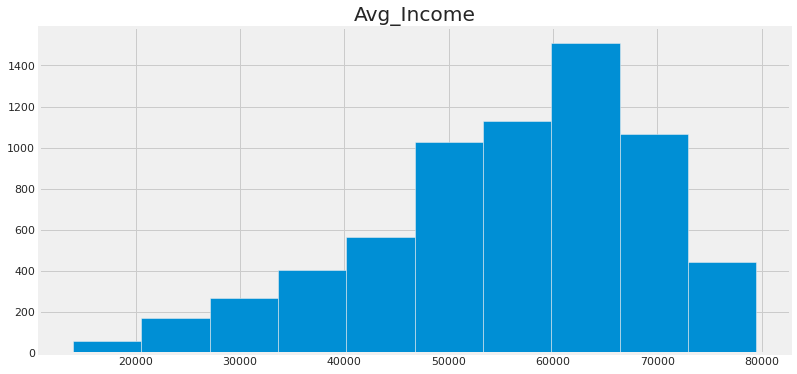

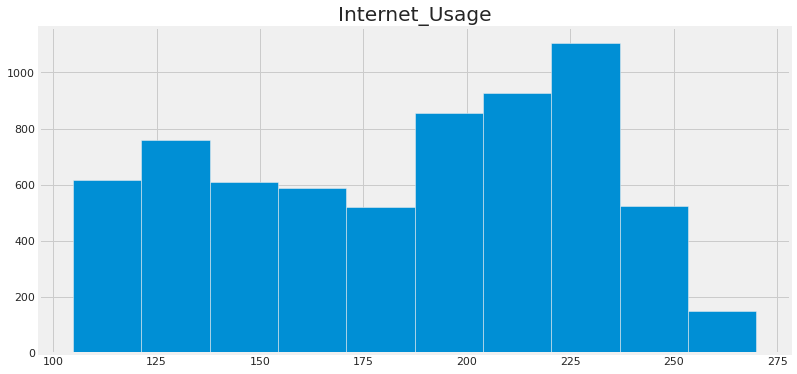

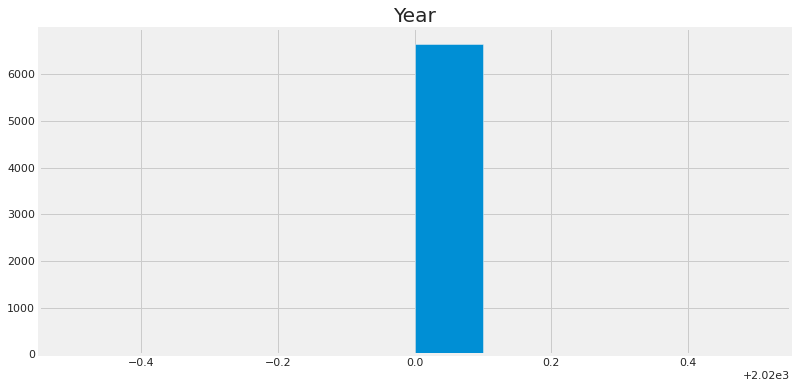

In [23]:
for col in numerical_col:
  df.hist(col, figsize=(12,6))
  plt.show()

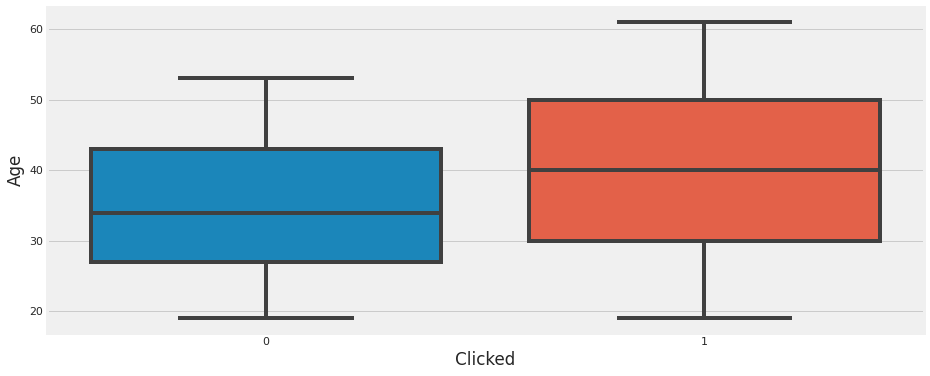

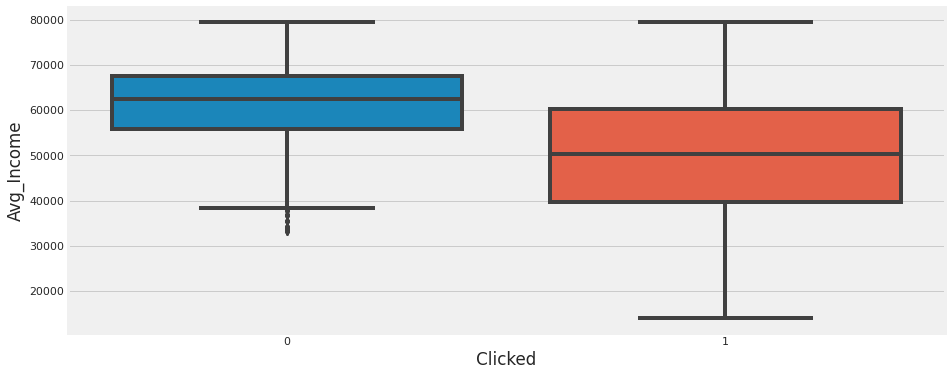

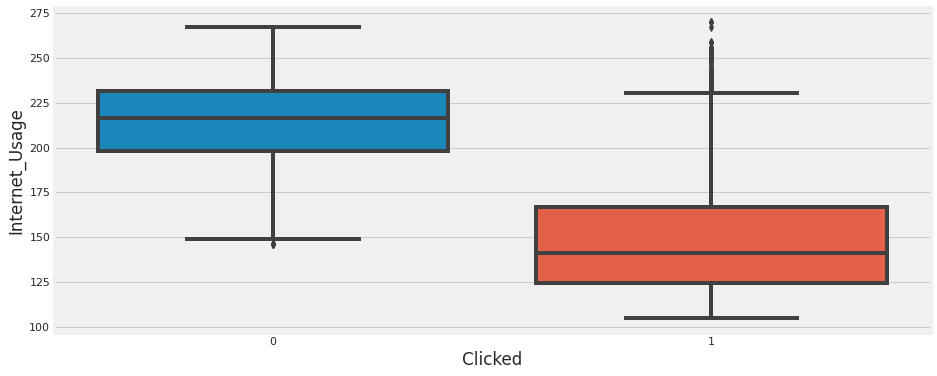

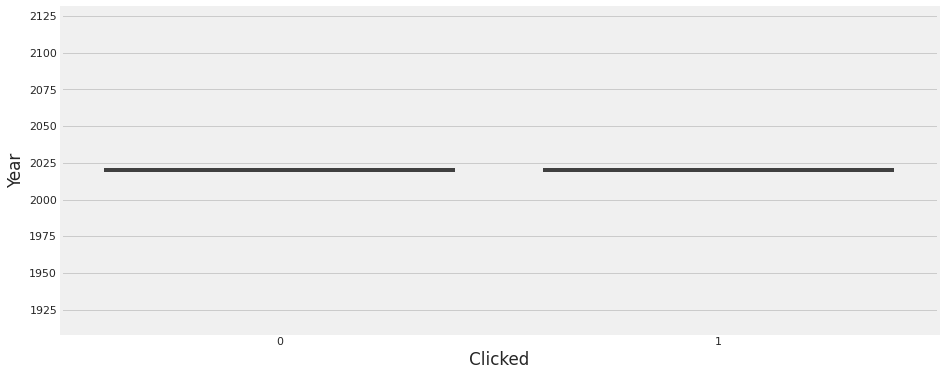

In [24]:
for col in numerical_col:
    plt.figure(figsize=(14,6))
    sns.boxplot(x="Clicked", y=col, data=df)
    plt.show()

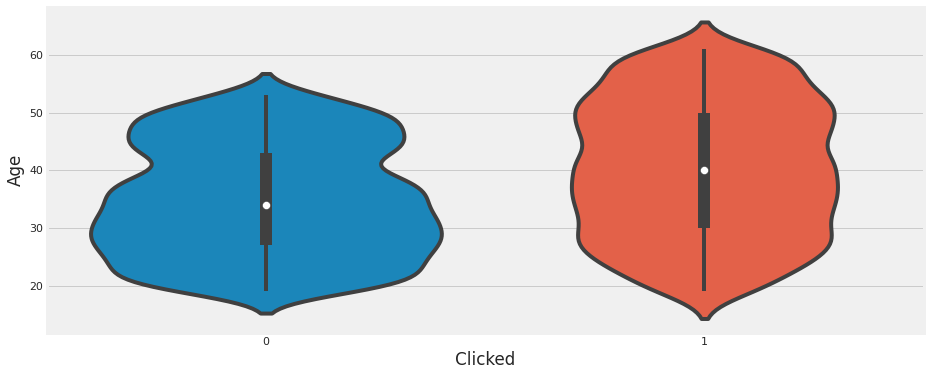

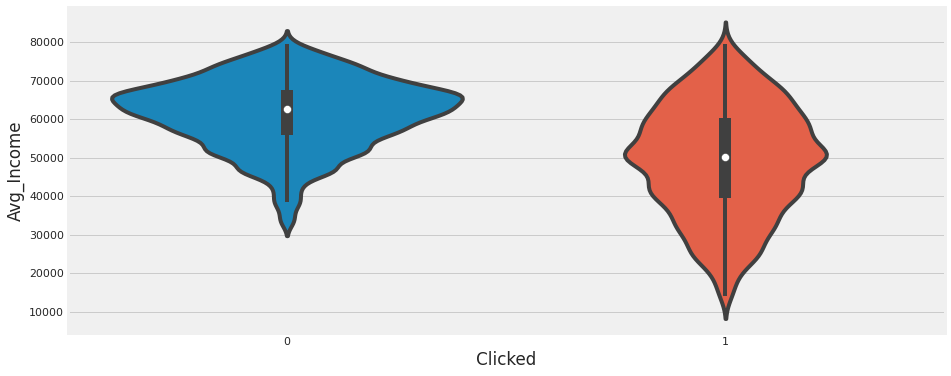

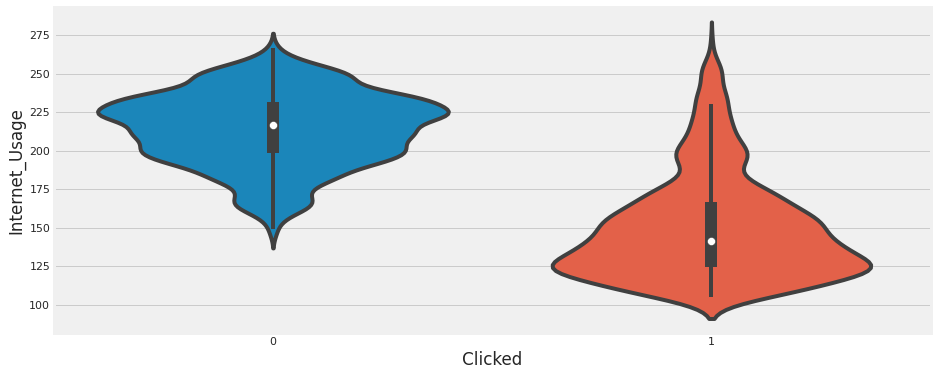

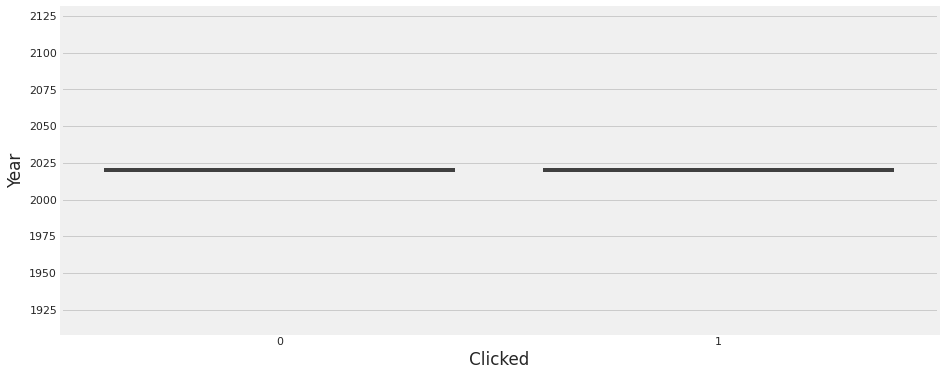

In [25]:
for col in numerical_col:
    plt.figure(figsize=(14,6))
    sns.violinplot(x="Clicked", y=col, data=df)
    plt.show()

### From above plots we learn that
- In `Age` higher the age less frequently they visited the website and mid-aged people are more frequent clicked the ad.
- In `Avg_Income` the distribution id left skewed and higher the income lesser the frequent they clicked the ad.
- In `Internet_Usage` people who spent maximum time in the website are less frequent to clicked the ad.

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

- Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
- ANOVA Test result: Probability of H0 being true

In [26]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [27]:
# Calling the function to check which categorical variables are correlated with target
FunctionAnova(inpData=df, TargetVariable="Clicked", ContinuousPredictorList=numerical_col)

##### ANOVA Results ##### 

Age is correlated with Clicked | P-Value: 6.40789044460054e-91
Avg_Income is correlated with Clicked | P-Value: 0.0
Internet_Usage is correlated with Clicked | P-Value: 0.0
Year is NOT correlated with Clicked | P-Value: nan


['Age', 'Avg_Income', 'Internet_Usage']

## From ANOVA test we saw 'Age', 'Avg_Income', 'Internet_Usage' are the variables have some impact on target variable.

<Figure size 1440x1440 with 0 Axes>

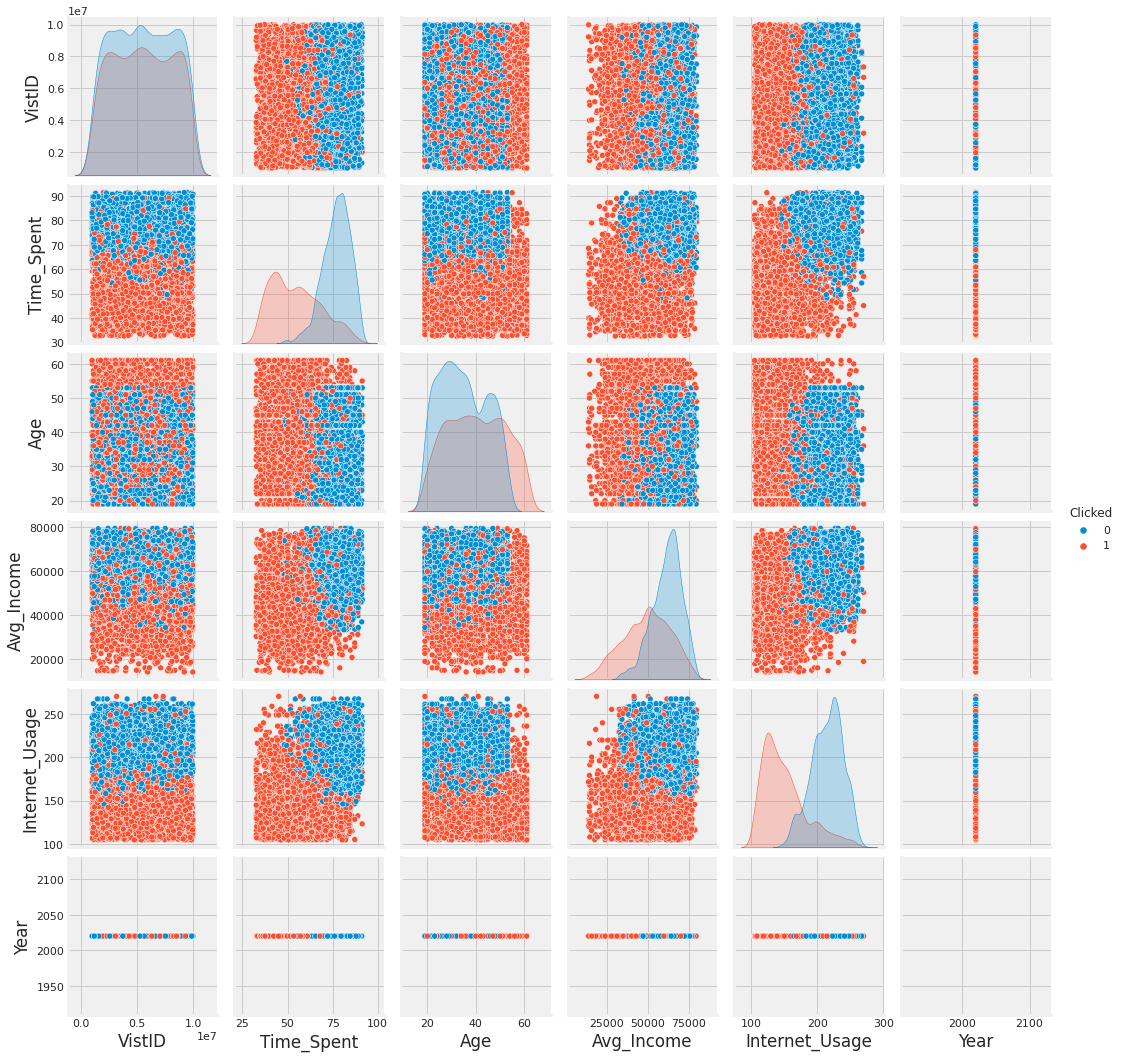

In [28]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, hue='Clicked')
plt.show()

### Check Correlation between two variables

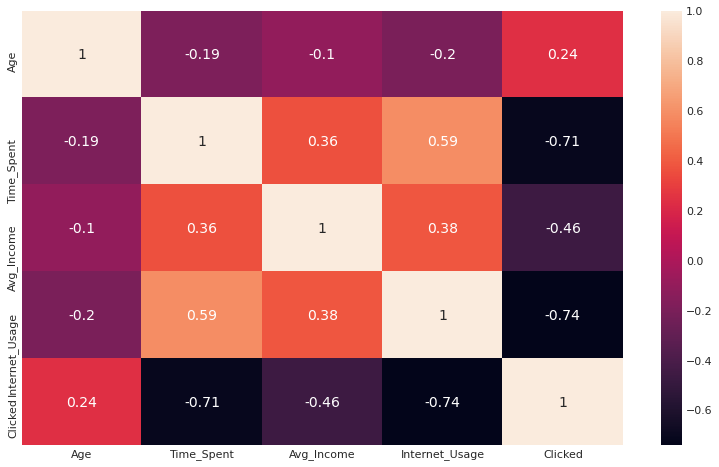

In [29]:
corr_data=df[['Age', 'Time_Spent', 'Avg_Income', 'Internet_Usage','Clicked']]
plt.figure(figsize=(12, 8))
sns.heatmap(corr_data.corr(), annot=True)
plt.show()

In [30]:
corr=corr_data.corr()
corr['Clicked'][abs(corr['Clicked']) > 0.5 ]

Time_Spent       -0.712439
Internet_Usage   -0.742764
Clicked           1.000000
Name: Clicked, dtype: float64

### Prepare Data for Logistic Regression Model
The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

Ultimately in predictive modeling machine learning projects you are more focused on making accurate predictions rather than interpreting the results. As such, you can break some assumptions as long as the model is robust and performs well.

- **Binary Output Variable:** This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- **Remove Noise:** Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- **Gaussian Distribution:** Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- **Remove Correlated Inputs:** Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- **Fail to Converge:** It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

In [31]:
# apply Label encoder to df_categorical
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in categorical_col:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(['VistID', 'Year', 'Clicked'], axis=1)
y = df['Clicked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (MinMaxScaler(), categorical_col),
    (StandardScaler(), numerical_col[:-1]),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Implimenting Logistic Regression which we are already build without `sikit-learn` library

#### Let's try first loss minimization with gradient descent and calculate the accuracy of our model.

In [34]:
import time
start_time = time.time()

num_iter = 100000
# learning_rate = [0.1,0.3,0.5,0.8]

intercept = np.ones((X_train.shape[0], 1)) 
X1 = np.concatenate((intercept, X_train), axis=1)
theta = np.zeros(X1.shape[1])

for i in range(num_iter):
    h = sigmoid(X1, theta)
    gradient = gradient_descent(X1, h, y_train)
    theta = update_weight_loss(theta, 0.99, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.99, num_iter))

Training time (Log Reg using Gradient descent):44.53957915306091 seconds
Learning rate: 0.99
Iteration: 100000


In [35]:
result = sigmoid(X1, theta)

In [36]:
print("Accuracy (Loss minimization):")
f = pd.DataFrame(result)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
f['Clicked'] = y_train.values
f.loc[f['pred']==f['Clicked']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


68.87744151105387

#### Now let's try maximum likelihood estimation and compute the accuracy.

In [37]:
start_time = time.time()
num_iter = 100000

intercept2 = np.ones((X_train.shape[0], 1))
X2 = np.concatenate((intercept2, X_train), axis=1)
theta2 = np.zeros(X2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(X2, theta2)
    gradient2 = gradient_ascent(X2, h2, y_train)
    theta2 = update_weight_mle(theta2, 0.99, gradient2)
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.99, num_iter))

Training time (Log Reg using MLE):41.84908723831177seconds
Learning rate: 0.99
Iteration: 100000


In [38]:
result2 = sigmoid(X2, theta2)

In [39]:
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2)
f2['pred'] = f2[0].apply(lambda x : 0 if x < 0.5 else 1)
f2['Clicked'] = y_train.values
f2.loc[f2['pred']==f2['Clicked']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


90.89933462116335

#### Finally we build ligistic regression from `sklearn` module.

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, fit_intercept=True, max_iter=100000)
print(logreg)
logreg.fit(X_train, y_train)

print("sklearn module: " + str(time.time() - start_time) + " seconds")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
sklearn module: 42.037841796875 seconds


In [41]:
result3 = logreg.predict(X_train)

In [42]:
print("Accuracy (sklearn's Logistic Regression):")
f3 = pd.DataFrame(result3)
f3['Clicked'] = y_train.values
f3.loc[f3[0]==f3['Clicked']].shape[0] / f3.shape[0] * 100

Accuracy (sklearn's Logistic Regression):


93.21742863275381

# Import Necessary Metrics to measure model Performance

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score,auc
from sklearn.model_selection import cross_val_score
from scipy import stats

<h2>Performance Measurement<h2>

#### 1. Confusion Matrix
- Each row: actual class
- Each column: predicted class

#### 2. Precision

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

#### 3. Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$ 

#### 4. F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

The $F_1$ score favours classifiers that have similar precision and recall.

# Evaluating the Logistic Regression model

### Checking Confusion Metrix

##### loss minimization with gradient descent

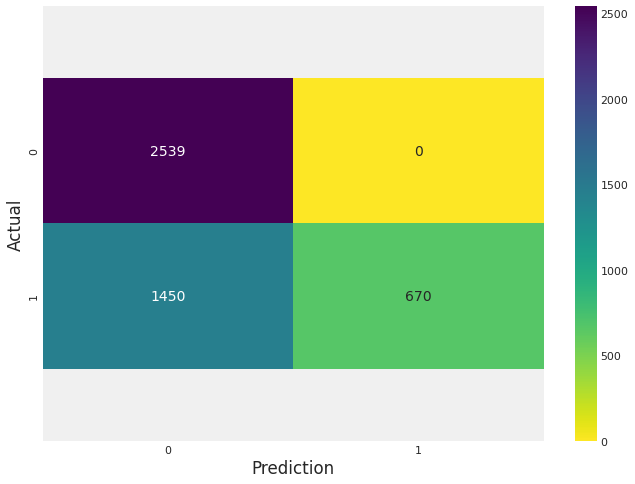

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      2539
           1       1.00      0.32      0.48      2120

    accuracy                           0.69      4659
   macro avg       0.82      0.66      0.63      4659
weighted avg       0.80      0.69      0.64      4659



In [44]:
cnf_matrix = confusion_matrix(f.Clicked, f.pred)

# confusion metrics
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(f.Clicked, f.pred))

First row: Non-clicked Ads, the negative class:
* 2539 were correctly classified as Non-clicked Ads. **True negatives**. 
* Remaining 0 were wrongly classified as clicked Ads. **False positive**


Second row: The clicked Ads, the positive class:
* 1450 were incorrectly classified as Non-clicked Ads. **False negatives**
* 670 were correctly classified clicked Ads. **True positives**

##### maximum likelihood estimation

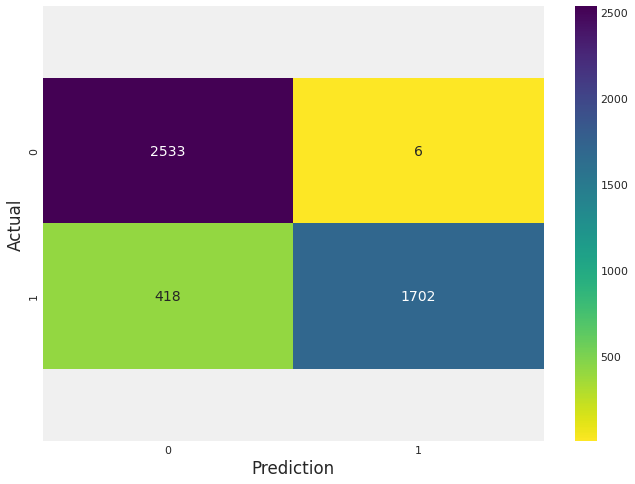

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2539
           1       1.00      0.80      0.89      2120

    accuracy                           0.91      4659
   macro avg       0.93      0.90      0.91      4659
weighted avg       0.92      0.91      0.91      4659



In [45]:
cnf_matrix = confusion_matrix(f2.Clicked, result2)

# confusion metrics
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(f2.Clicked, result2))

Over here we see 
* **True negatives** - 2533
* **False positive** - 6
* **False negatives** - 418
* **True positives** - 1702

Which is better score than last iteration. So in this data maximum likelihood perform better than loss minimization.

##### Finally check the Logistic Regression from `Sikit-Learn` Library

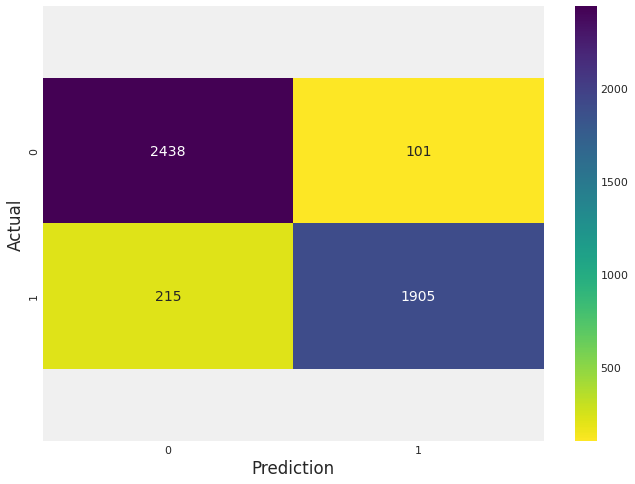

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2539
           1       0.95      0.90      0.92      2120

    accuracy                           0.93      4659
   macro avg       0.93      0.93      0.93      4659
weighted avg       0.93      0.93      0.93      4659



In [46]:
cnf_matrix = confusion_matrix(y_train, result3)

# confusion metrics
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_train, result3))

#### Precision / Recall Tradeoff

Increasing precision reduced recall and vice versa

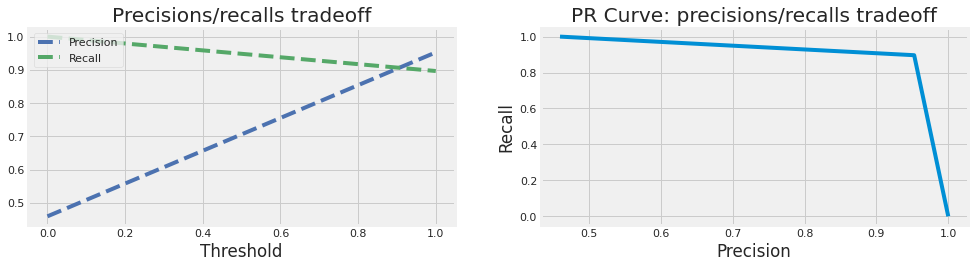

In [47]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")

precisions, recalls, thresholds = precision_recall_curve(y_test, logreg.predict(X_test))

plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff")
plt.show()

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

<h2>The Receiver Operating Characteristics (ROC) Curve<h2>

Instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

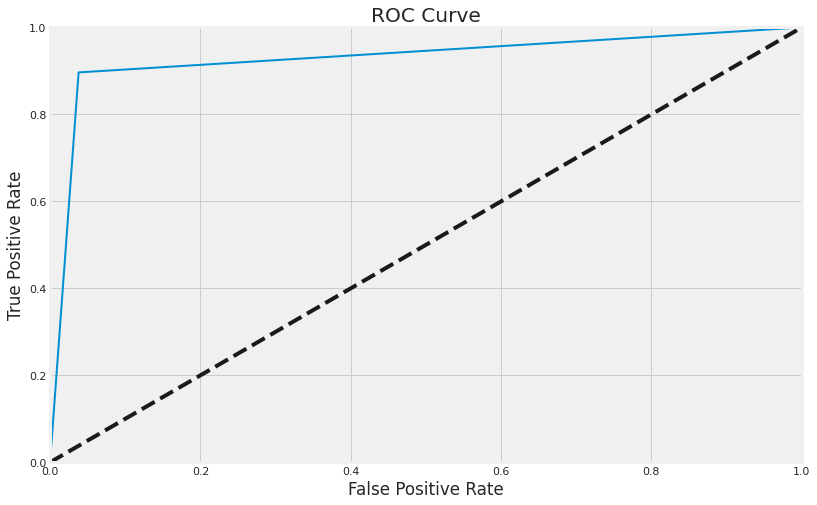

In [48]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test))
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, logreg.predict(X_test))

0.9292755991285403

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives


In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

In this kernel, we've created a logistic regression from scratch. We've learned the computations happening at the back-end of a Logistic Regression. We've transormed these equations and mathematical functions into python codes. We've trained our logistic regression function in two ways: through loss minimizing using gradient descent and maximizing the likelihood using gradient ascent. The Website Ad Click dataset was used for training and also evaluation. Below is the result of the evaluation (not dynamic)

<table>
    <tr>
        <td>**LR model**</td>
        <td>**training time (4659 records)**</td>
        <td>**training accuracy**</td>
    </tr>
     <tr>
        <td>Loss function + Gradient descent</td>
        <td>44 seconds</td>
        <td>68.9%</td>
    </tr>
     <tr>
        <td>MLE + Gradient ascent</td>
        <td>42 seconds</td>
        <td>90.9%</td>
    </tr>
    <tr>
        <td>sklearn</td>
        <td>66 seconds</td>
        <td>92.8%</td>
    </tr>
</table><br>
While the table shows that MLE + Gradient ascent and sklearn give similar performance, we have to consider the number of training iterations we've set as well as other hyperparameters. We randomly chose 100,000 as the number of iteration for this exercise, increasing or decreasing it might change the result, that's yours to find out. Despite all of these, our function (MLE+Gradient ascent) performed quite well I would say, it's not that far out from the accuracy of sklearn, however there are other metrics to consider in comparing these models, that's also yours to find out. <br>
To wrap things up let us review our objectives and wether we've accomplished them. The first objective was to understand the theory behind Logistic Regression. I do hope that you understood the things I stated here. The second objective was to implement the Logistic Regression without using built-in Logistic Regression libraries, it was trained, and evaluated. In the same section, we have also predicted if a person clicked the ad or not. <br><br>
This logistic regression implementation would probably be never used in production and it is unlikely that it will defeat sklearn's own LogisticRegression module, however the goal of this kernel was to understand intrecately the structure of different algorithms, in this case, Logistic Regression. Stay tuned, for more of this kind of kernels. If you liked this kernel please leave a comment and upvote, thank you.